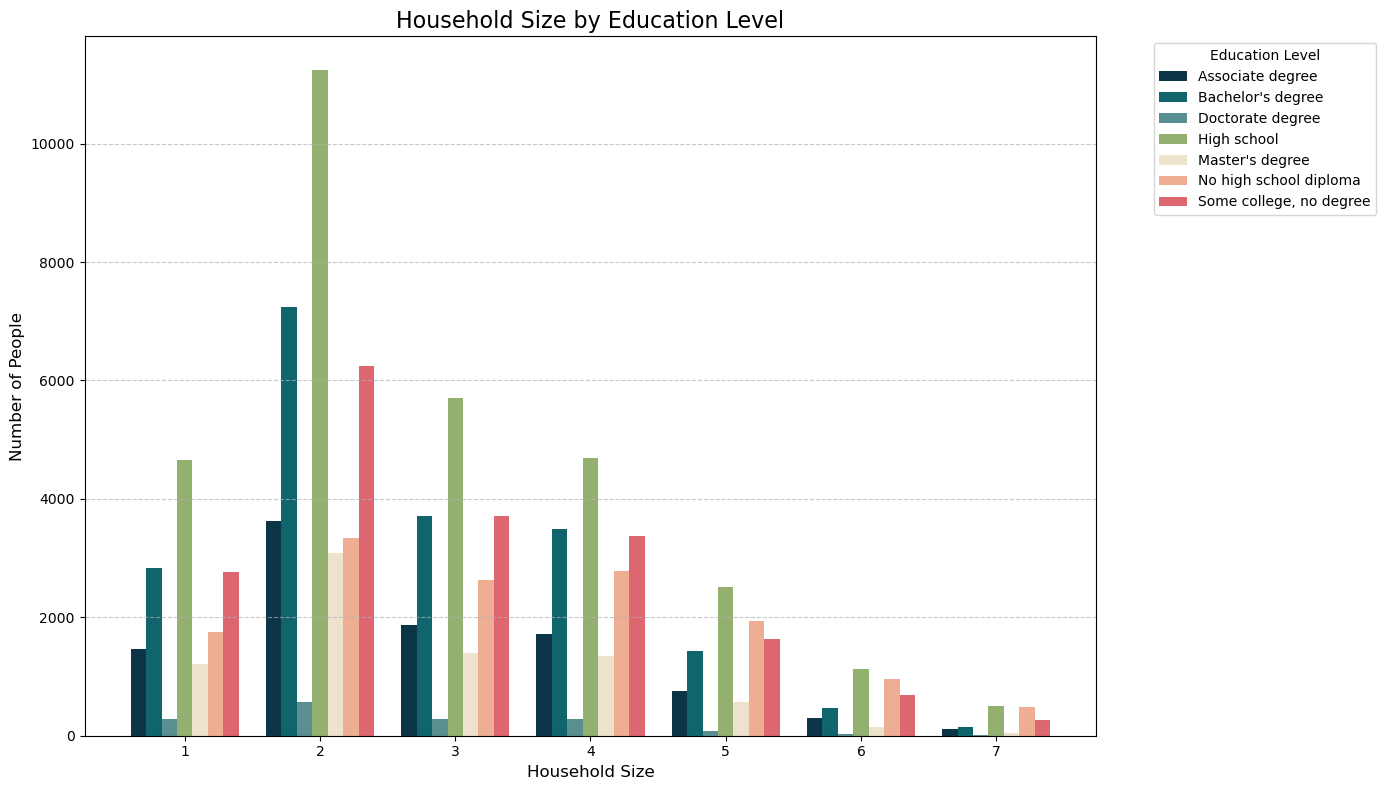

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('CPSData.csv')

# Remove 'MetroAreaCode' and 'CountryOfBirthCode' columns
data = data.drop(columns=['MetroAreaCode', 'CountryOfBirthCode'])

# Check to confirm columns are removed
#print("Remaining columns:", data.columns)

# Apply filters and modifications together
filteredData = (
    data[
        (data['Age'] >= 16) &  # Keep rows where age is 16 or older
        (data['Education'] != 'Professional degree') &  # Exclude 'Professional degree'
        (data['PeopleInHousehold'] < 8)  # Include rows where household size is less than 8
    ].copy()  # Ensure it's a proper copy to avoid SettingWithCopyWarning
)

# Update the 'Race' column to "Hispanic" wherever the 'Hispanic' column is 1
if 'Hispanic' in filteredData.columns:  # Ensure the column exists
    filteredData.loc[filteredData['Hispanic'] == 1, 'Race'] = 'Hispanic'

# Drop the 'Hispanic' column if it exists
if 'Hispanic' in filteredData.columns:
    filteredData = filteredData.drop(columns=['Hispanic'])

# Display the resulting filtered data
# print("Filtered Data:")
# print(filteredData.head())

# Group the data by household size and education level
groupedData = filteredData.groupby(['PeopleInHousehold', 'Education']).size().reset_index(name='Count')

# Pivot the data for plotting
pivotData = groupedData.pivot(index='PeopleInHousehold', columns='Education', values='Count').fillna(0)

# Define custom colors for each education level
customColors = ['#0c3547', '#10656d', '#598f91', '#93b071', '#ede2cc', '#edae93', '#dd6670', '#eeb3b8']

# Plot the segmented bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.8 / len(pivotData.columns)  # Divide bar width by the number of categories
x = np.arange(len(pivotData.index))  # X positions for household sizes

for i, col in enumerate(pivotData.columns):
    ax.bar(
        x + i * bar_width,  # Offset bars for each education level
        pivotData[col],
        bar_width,
        label=col,
        color=customColors[i % len(customColors)]  # Assign colors
    )

# Customize the plot
ax.set_title('Household Size by Education Level', fontsize=16)
ax.set_xlabel('Household Size', fontsize=12)
ax.set_ylabel('Number of People', fontsize=12)
ax.set_xticks(x + bar_width * (len(pivotData.columns) - 1) / 2)  # Center tick labels
ax.set_xticklabels(pivotData.index, fontsize=10)
ax.legend(title='Education Level', fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig('HouseholdSizebyEducationLevel.png', dpi=300, bbox_inches='tight')  # Save with desired filename and quality
plt.show()

In [66]:
# Step 2: Group Data by Region and Race
grouped_data = filteredData.groupby(['Region', 'Race']).agg(
    AvgHouseholdSize=('PeopleInHousehold', 'mean'),
    MedianHouseholdSize=('PeopleInHousehold', 'median'),
    Count=('PeopleInHousehold', 'size')
).reset_index()

# Display the grouped data
grouped_data.head()

,Region,Race,AvgHouseholdSize,MedianHouseholdSize,Count
0,Midwest,American Indian,3.337778,3.0,225
1,Midwest,Asian,3.197208,3.0,573
2,Midwest,Black,2.821347,2.0,1752
3,Midwest,Hispanic,3.555461,4.0,1181
4,Midwest,Multiracial,3.055556,3.0,216


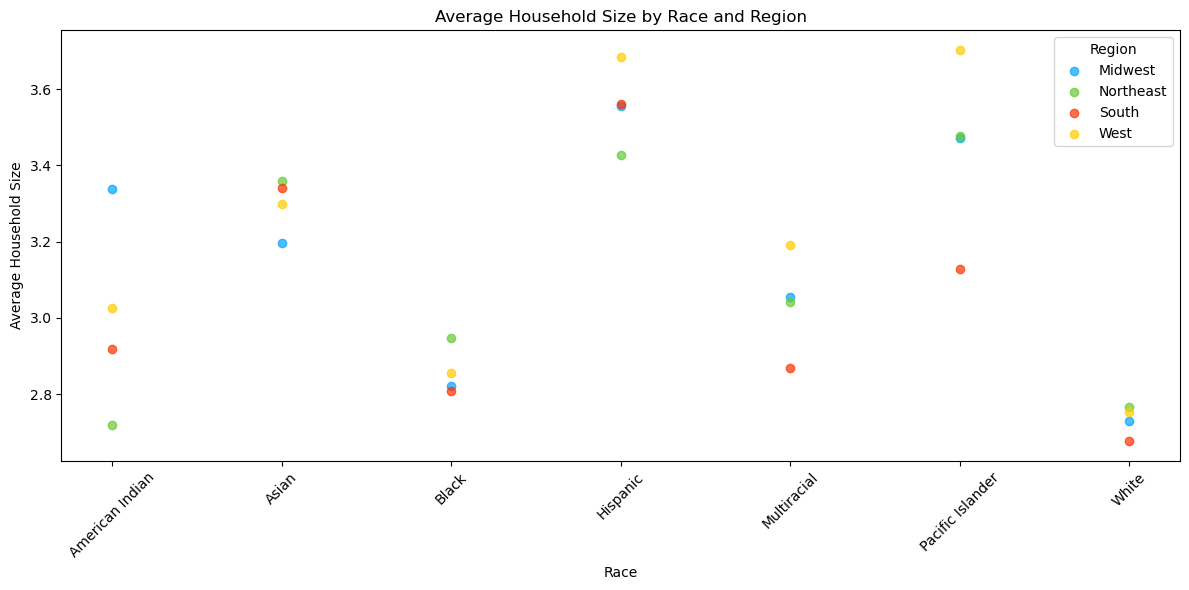

In [68]:
# Define custom colors for each region
regionColors = {
    'Midwest': '#02a5ff',
    'South': '#ff3300',
    'Northeast': '#66cc33',
    'West': '#ffcc00'
}
#Create the scatter plot
plt.figure(figsize=(12, 6))
for region in grouped_data['Region'].unique():
    region_data = grouped_data[grouped_data['Region'] == region]
    plt.scatter(
        region_data['Race'], 
        region_data['AvgHouseholdSize'], 
        label=region, 
        color=regionColors.get(region), 
        alpha=0.7
    )

plt.title('Average Household Size by Race and Region')
plt.xlabel('Race')
plt.ylabel('Average Household Size')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('AverageHouseholdSizebyRaceandRegion.png', dpi=300, bbox_inches='tight')  # Save with desired filename and quality
plt.show()

In [240]:
# # Group data by Industry and Race, and calculate counts
# industry_representation = filteredData.groupby(['Industry', 'Race']).size().unstack(fill_value=0)

# # Calculate percentage representation within each industry
# industry_representation_pct = industry_representation.div(industry_representation.sum(axis=1), axis=0) * 100

# # Display representation percentages
# industry_representation_pct.head()

In [242]:
# # Prepare data for box plot
# industry_melted = industry_representation_pct.reset_index().melt(
#     id_vars='Industry', var_name='Race', value_name='Representation'
# )

# # Create box plot using matplotlib
# plt.figure(figsize=(12, 6))

# # Group by Race and create box plots
# unique_races = industry_melted['Race'].unique()
# positions = np.arange(len(unique_races))
# data = [industry_melted[industry_melted['Race'] == race]['Representation'] for race in unique_races]

# # Plot the box plot
# plt.boxplot(data, positions=positions, patch_artist=True, boxprops=dict(facecolor="#D9E6F2"))

# # Add labels
# plt.title('Representation of Demographic Groups Across Industries', fontsize=16)
# plt.xlabel('Race', fontsize=12)
# plt.ylabel('Percentage Representation', fontsize=12)
# plt.xticks(ticks=positions, labels=unique_races, rotation=45)

# # Tight layout and show
# plt.tight_layout()
# plt.show()

In [244]:
# # Group data by Citizenship and EmploymentStatus
# citizenship_employment = filteredData.groupby(['Citizenship', 'EmploymentStatus']).size().unstack(fill_value=0)

# # Calculate percentage representation
# citizenship_employment_pct = citizenship_employment.div(citizenship_employment.sum(axis=1), axis=0) * 100

# # Bar chart
# citizenship_employment_pct.plot(kind='bar', figsize=(12, 6), stacked=True)
# plt.title('Employment Status by Citizenship')
# plt.xlabel('Citizenship')
# plt.ylabel('Percentage')
# plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [246]:
# # Filter data for individuals aged over 65
# over_65_data = filteredData[filteredData['Age'] > 65]

# # Group by Citizenship and EmploymentStatus, and count occurrences
# citizenship_employment_65 = over_65_data.groupby(['Citizenship', 'EmploymentStatus']).size().unstack(fill_value=0)

# # Calculate percentage distribution within each citizenship group
# citizenship_employment_65_pct = citizenship_employment_65.div(citizenship_employment_65.sum(axis=1), axis=0) * 100

# # Display grouped data
# print(citizenship_employment_65_pct)

In [248]:
# # Stacked bar chart
# citizenship_employment_65_pct.plot(kind='bar', figsize=(12, 6), stacked=True)

# # Add titles and labels
# plt.title('Employment Status for Individuals Over 65 by Citizenship', fontsize=16)
# plt.xlabel('Citizenship', fontsize=12)
# plt.ylabel('Percentage (%)', fontsize=12)
# plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

Education             Associate degree  Bachelor's degree  Doctorate degree  \
Citizenship                                                                   
Citizen, Native              10.131275          19.177663          1.338820   
Citizen, Naturalized          9.053809          22.218863          2.917170   
Non-Citizen                   4.707646          14.317841          2.083958   

Education             High school  Master's degree  No high school diploma  \
Citizenship                                                                  
Citizen, Native         30.572938         7.622546               11.696821   
Citizen, Naturalized    26.647521         8.585248               17.759976   
Non-Citizen             25.622189         7.481259               36.011994   

Education             Some college, no degree  
Citizenship                                    
Citizen, Native                     19.459937  
Citizen, Naturalized                12.817412  
Non-Citizen          

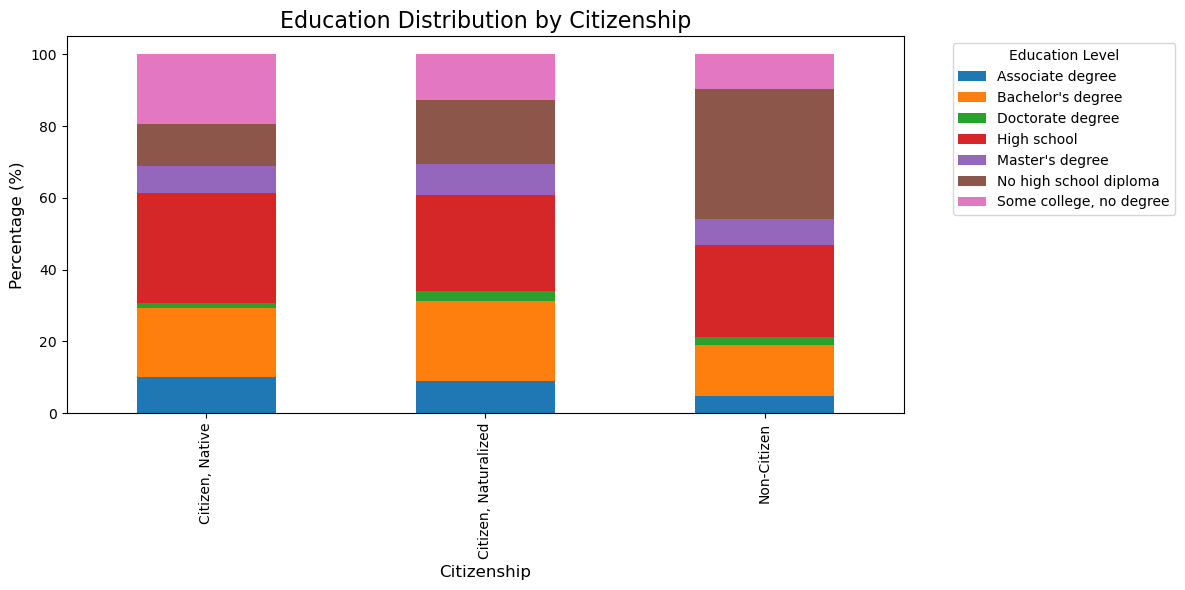

In [47]:
# Group by Citizenship and Education, and calculate counts
education_citizenship = filteredData.groupby(['Citizenship', 'Education']).size().unstack(fill_value=0)

# Calculate percentage distribution within each citizenship group
education_citizenship_pct = education_citizenship.div(education_citizenship.sum(axis=1), axis=0) * 100

# Display grouped data
print(education_citizenship_pct)

# Plot stacked bar chart
education_citizenship_pct.plot(kind='bar', figsize=(12, 6), stacked=True)

# Add titles and labels
plt.title('Education Distribution by Citizenship', fontsize=16)
plt.xlabel('Citizenship', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('EducationDistributionbyCitizenship.png', dpi=300, bbox_inches='tight')  # Save with desired filename and quality
plt.show()

In [252]:
# # Group by demographic variables and EmploymentStatus
# employment_demographics = filteredData.groupby(['Sex', 'Age', 'Education', 'Married', 'EmploymentStatus']).size().unstack(fill_value=0)

# # Calculate percentage distribution within each demographic group
# employment_demographics_pct = employment_demographics.div(employment_demographics.sum(axis=1), axis=0) * 100

# # Display the grouped data
# print(employment_demographics_pct.head())

In [254]:
# # Group by Gender and EmploymentStatus
# employment_gender = filteredData.groupby(['Sex', 'EmploymentStatus']).size().unstack(fill_value=0)

# # Calculate percentage distribution for each gender
# employment_gender_pct = employment_gender.div(employment_gender.sum(axis=1), axis=0) * 100

# # Plot stacked bar chart
# employment_gender_pct.plot(kind='bar', stacked=True, figsize=(12, 6))
# plt.title('Employment Status by Gender', fontsize=16)
# plt.xlabel('Sex', fontsize=12)
# plt.ylabel('Percentage (%)', fontsize=12)
# plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [256]:
# # Create age groups
# bins = [0, 18, 35, 50, 65, 100]
# labels = ['<18', '18-35', '36-50', '51-65', '65+']
# filteredData['AgeGroup'] = pd.cut(filteredData['Age'], bins=bins, labels=labels)

# # Group by AgeGroup and EmploymentStatus
# employment_age = filteredData.groupby(['AgeGroup', 'EmploymentStatus']).size().unstack(fill_value=0)

# # Plot grouped bar chart
# employment_age.plot(kind='bar', figsize=(12, 6))
# plt.title('Employment Status by Age Group', fontsize=16)
# plt.xlabel('Age Group', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [258]:
# # Group data by Gender and EmploymentStatus
# gender_labor_force = filteredData.groupby(['Sex', 'EmploymentStatus']).size().unstack(fill_value=0)

# # Calculate percentage for each gender
# gender_labor_force_pct = gender_labor_force.div(gender_labor_force.sum(axis=1), axis=0) * 100

# # Plot a stacked bar chart
# gender_labor_force_pct.plot(kind='bar', stacked=True, figsize=(12, 6))
# plt.title('Labor Force Participation by Gender', fontsize=16)
# plt.xlabel('Sex', fontsize=12)
# plt.ylabel('Percentage (%)', fontsize=12)
# plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [260]:
# # Filter for women not in labor force
# women_not_labor_force = filteredData[(filteredData['Sex'] == 'Female') & (filteredData['EmploymentStatus'] == 'Not in Labor Force')]

# # Group by Household Size
# household_size_distribution = women_not_labor_force['PeopleInHousehold'].value_counts()

# # Plot household size distribution
# plt.figure(figsize=(10, 6))
# plt.bar(household_size_distribution.index, household_size_distribution.values, color='#66b3ff')
# plt.title('Household Size Distribution for Women Not in Labor Force', fontsize=16)
# plt.xlabel('Number of People in Household', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.tight_layout()
# plt.show()

In [262]:
# Group by Education Level
education_distribution = women_not_labor_force['Education'].value_counts(normalize=True) * 100

# Plot education distribution
plt.figure(figsize=(12, 6))
plt.bar(education_distribution.index, education_distribution.values, color='#99ccff')
plt.title('Education Levels for Women Not in Labor Force', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
# Group by Industry and a demographic variable (e.g., Gender, Race)
industry_representation = filteredData.groupby(['Industry', 'Race']).size().unstack(fill_value=0)

# Calculate percentage representation within each industry
industry_representation_pct = industry_representation.div(industry_representation.sum(axis=1), axis=0) * 100

# Display the data
print(industry_representation_pct.head())


Race                                         American Indian     Asian  \
Industry                                                                 
Agriculture, forestry, fishing, and hunting         0.640000  1.360000   
Armed forces                                        0.000000  3.703704   
Construction                                        0.786309  1.942646   
Educational and health services                     0.825128  4.715019   
Financial                                           0.328330  4.948405   

Race                                             Black   Hispanic  \
Industry                                                            
Agriculture, forestry, fishing, and hunting   1.200000  16.560000   
Armed forces                                 14.814815  14.814815   
Construction                                  4.209066  18.455134   
Educational and health services              11.309111   9.055609   
Financial                                     7.833021   8.278612  

/var/folders/_n/26wh7y9j1nn99466ht1bfgm40000gn/T/ipykernel_94666/1775861499.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=demographics, patch_artist=True, boxprops=dict(facecolor="#66b3ff"))


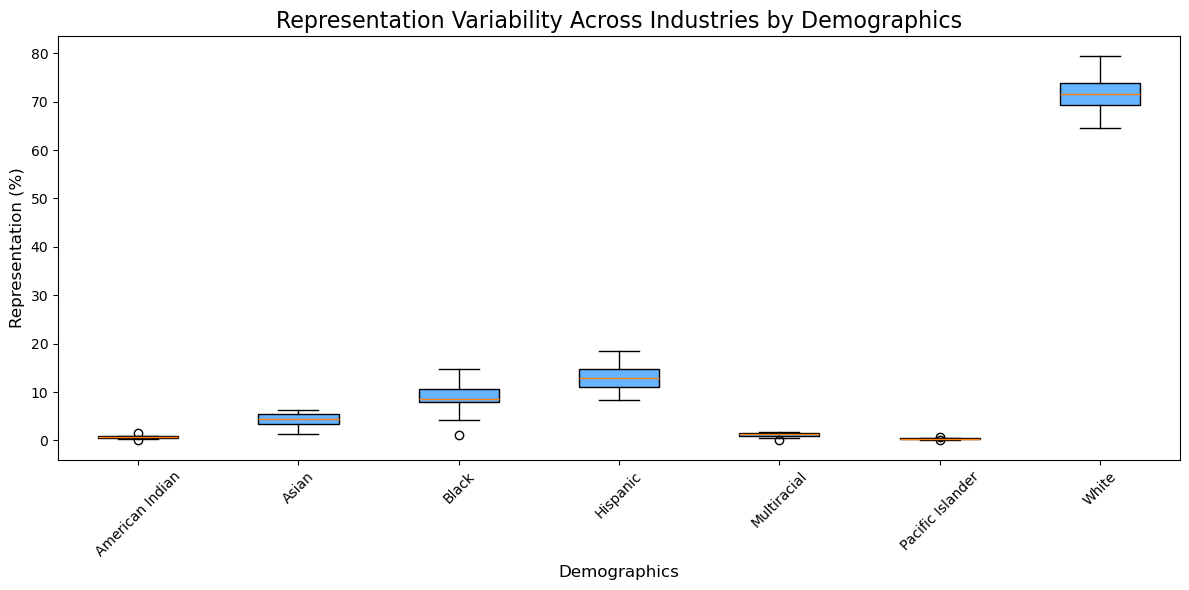

In [57]:
#Melt data for plotting
industry_melted = industry_representation_pct.reset_index().melt(
    id_vars='Industry', var_name='Demographic', value_name='Representation'
)

#Group data by demographics for box plot
demographics = industry_melted['Demographic'].unique()
data = [industry_melted[industry_melted['Demographic'] == demo]['Representation'] for demo in demographics]

#Plot box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=demographics, patch_artist=True, boxprops=dict(facecolor="#66b3ff"))

# Add labels
plt.title('Representation Variability Across Industries by Demographics', fontsize=16)
plt.xlabel('Demographics', fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.savefig('RepresentationVariabilityAcrossIndustriesbyDemographics.png', dpi=300, bbox_inches='tight')  # Save with desired filename and quality
plt.show()

In [268]:
# # Calculate overall demographic distribution
# overall_demographics = filteredData['Race'].value_counts(normalize=True) * 100

# # Compare industry percentages to overall percentages
# deviation_from_average = industry_representation_pct - overall_demographics
# print(deviation_from_average)

In [270]:
# import requests
# import pandas as pd

# # Your BLS API Key
# api_key = '7bc1e1514a1d44a5b23a15570e1db540'

# # BLS Series IDs for employment-to-population ratio
# series_ids = {
#     'Men': 'LNS12300001',
#     'Women': 'LNS12300002'
# }

# # Initialize an empty list to collect rows
# employment_rows = []

# # Process data for 2023
# for gender, df in employment_data.items():
#     df['year'] = df['year'].astype(int)
#     df['value'] = df['value'].astype(float)
#     employment_ratio = df[df['year'] == 2023]['value'].iloc[0]
#     employment_rows.append({'Gender': gender, 'EmploymentRatio': employment_ratio})

# # Convert list to DataFrame
# df_employment = pd.DataFrame(employment_rows)

# # Display the processed data
# print(df_employment)

In [272]:
# import matplotlib.pyplot as plt

# # Plot the data
# plt.figure(figsize=(8, 5))
# plt.bar(df_employment['Gender'], df_employment['EmploymentRatio'], color=['blue', 'orange'])
# plt.title('Employment-to-Population Ratio by Gender (2023)', fontsize=16)
# plt.xlabel('Gender', fontsize=12)
# plt.ylabel('Employment Ratio (%)', fontsize=12)
# plt.ylim(0, max(df_employment['EmploymentRatio']) + 5)
# plt.tight_layout()
# plt.show()

In [274]:
# import requests
# import pandas as pd

# # Your BLS API key
# api_key = '7bc1e1514a1d44a5b23a15570e1db540'

# # BLS Series IDs for employment-to-population ratio
# series_ids = {
#     'Men': 'LNS12300001',  # Employment-to-population ratio for men
#     'Women': 'LNS12300002'  # Employment-to-population ratio for women
# }

# # Initialize an empty DataFrame to store results
# employment_data = []

# # Fetch data for each gender
# for gender, series_id in series_ids.items():
#     url = f'https://api.bls.gov/publicAPI/v2/timeseries/data/{series_id}?registrationkey={api_key}'
#     response = requests.get(url)
#     data = response.json()

#     # Extract data points for 2013 and 2023
#     series_data = pd.DataFrame(data['Results']['series'][0]['data'])
#     series_data['year'] = series_data['year'].astype(int)
#     series_data['value'] = series_data['value'].astype(float)

#     # Filter for 2013 and 2023
#     filtered_data = series_data[series_data['year'].isin([2013, 2023])]
#     for _, row in filtered_data.iterrows():
#         employment_data.append({
#             'Gender': gender,
#             'Year': row['year'],
#             'EmploymentRatio': row['value']
#         })

# # Convert the data into a DataFrame
# comparison_df = pd.DataFrame(employment_data)

# # Display the DataFrame
# print(comparison_df)

In [276]:
# import requests
# import pandas as pd

# # Your Census API Key
# api_key = '0a6b60135136d52965b7021241f7cfae54db1d4c'

# # Define the API base URL and table
# base_url = 'https://api.census.gov/data/2013/acs/acs5'
# variables = {
#     'Black': 'B19013B_001E',
#     'AmericanIndian': 'B19013C_001E',
#     'Asian': 'B19013D_001E',
#     'WhiteNonHispanic': 'B19013H_001E',
#     'Hispanic': 'B19013I_001E'
# }

# # State-level query example (can be adjusted for other geographies)
# state_fips = '01'  # Alabama as an example; use "US" for national
# income_data = []

# for race, var in variables.items():
#     query_url = f'{base_url}?get={var},NAME&for=state:{state_fips}&key={api_key}'
#     response = requests.get(query_url)
#     data = response.json()

#     # Parse the response
#     race_income = {
#         'Race': race,
#         'State': data[1][1],
#         'MedianIncome': int(data[1][0])  # Extract income value
#     }
#     income_data.append(race_income)

# # Convert to DataFrame
# income_df = pd.DataFrame(income_data)

# # Display the DataFrame
# print(income_df)

In [278]:
# import requests
# import pandas as pd

# # Your Census API Key
# api_key = '0a6b60135136d52965b7021241f7cfae54db1d4c'

# # Base URL for 2020 ACS 5-Year Data
# base_url = 'https://api.census.gov/data/2020/acs/acs5'

# # Variables for educational attainment
# variables = [
#     'B15002_003E',  # Less than 9th grade
#     'B15002_004E',  # 9th to 12th grade, no diploma
#     'B15002_005E',  # High school graduate
#     'B15002_006E',  # Some college, no degree
#     'B15002_007E',  # Associate's degree
#     'B15002_008E',  # Bachelor's degree
#     'B15002_009E',  # Master's degree
#     'B15002_010E',  # Professional school degree
#     'B15002_011E'   # Doctorate degree
# ]

# # Query the API for state-level data
# query_url = f'{base_url}?get={",".join(variables)},NAME&for=state:*&key={api_key}'
# response = requests.get(query_url)

# # Process the response
# if response.status_code == 200:
#     # Convert to DataFrame
#     data = response.json()
#     columns = ['LessThan9th', '9thTo12thNoDiploma', 'HighSchoolDiploma', 'SomeCollegeNoDegree',
#                'AssociateDegree', 'BachelorsDegree', 'MastersDegree', 'ProfessionalDegree', 'DoctorateDegree', 'State', 'StateFIPS']
#     state_data = pd.DataFrame(data[1:], columns=columns)
    
#     # Convert numeric columns to integers
#     numeric_cols = columns[:-2]  # Exclude 'State' and 'StateFIPS'
#     state_data[numeric_cols] = state_data[numeric_cols].astype(int)
    
#     # Add aggregate levels
#     state_data['NoHighSchoolDiploma'] = state_data['LessThan9th'] + state_data['9thTo12thNoDiploma']
#     state_data['GraduateOrHigher'] = state_data['MastersDegree'] + state_data['ProfessionalDegree'] + state_data['DoctorateDegree']

#     # Drop individual subcategories if not needed
#     state_data = state_data[['State', 'NoHighSchoolDiploma', 'HighSchoolDiploma', 'SomeCollegeNoDegree',
#                              'AssociateDegree', 'BachelorsDegree', 'GraduateOrHigher']]
    
#     # Display state-level data
#     print(state_data.head())
# else:
#     print("API Error:", response.status_code)
#     print(response.text)

In [280]:
# # Calculate total population for each state
# state_data['TotalPopulation'] = state_data.iloc[:, 1:].sum(axis=1)

# # Normalize data to percentages
# for col in state_data.columns[1:-1]:  # Exclude 'State' and 'TotalPopulation'
#     state_data[col] = (state_data[col] / state_data['TotalPopulation']) * 100

# # Drop 'TotalPopulation' if not needed
# state_data.drop(columns=['TotalPopulation'], inplace=True)

# # Display normalized state data
# print(state_data.head())

In [282]:
# # Plot normalized data
# state_data.set_index('State').plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

# plt.title('Educational Attainment by State (2020)', fontsize=16)
# plt.xlabel('State', fontsize=12)
# plt.ylabel('Percentage (%)', fontsize=12)
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Educational Level', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [284]:
# import requests
# import pandas as pd
# import matplotlib.pyplot as plt

# # Your Census API Key
# api_key = '0a6b60135136d52965b7021241f7cfae54db1d4c'

# # Base URLs for 2013, 2015, 2020 ACS 5-Year Data
# base_urls = {
#     2009: 'https://api.census.gov/data/2009/acs/acs5',
#     2013: 'https://api.census.gov/data/2013/acs/acs5',
#     2015: 'https://api.census.gov/data/2015/acs/acs5',
#     2020: 'https://api.census.gov/data/2020/acs/acs5',
# }

# # Variable for Bachelor's degree
# variable = 'B15002_008E'  # Bachelor's degree

# # Mapping of states to Census regions
# regions = {
#     'South': [
#         'Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 
#         'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'
#     ],
#     'Midwest': [
#         'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 
#         'Ohio', 'South Dakota', 'Wisconsin'
#     ],
#     'Northeast': [
#         'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 
#         'Rhode Island', 'Vermont'
#     ],
#     'West': [
#         'Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 
#         'Utah', 'Washington', 'Wyoming'
#     ]
# }

# # Helper function to map states to regions
# def get_region(state):
#     for region, states in regions.items():
#         if state in states:
#             return region
#     return 'Unknown'

# # Initialize list to store regional data for both years
# all_region_data = []

# # Loop through years and fetch data
# for year, base_url in base_urls.items():
#     query_url = f'{base_url}?get={variable},NAME&for=state:*&key={api_key}'
#     response = requests.get(query_url)

#     if response.status_code == 200:
#         # Convert to DataFrame
#         data = response.json()
#         columns = ['BachelorsDegree', 'State', 'StateFIPS']
#         state_data = pd.DataFrame(data[1:], columns=columns)

#         # Convert numeric column to integer
#         state_data['BachelorsDegree'] = pd.to_numeric(state_data['BachelorsDegree'], errors='coerce')

#         # Map states to regions
#         state_data['Region'] = state_data['State'].apply(get_region)

#         # Group by Region and sum Bachelor's Degree counts
#         region_data = state_data.groupby('Region')['BachelorsDegree'].sum().reset_index()
#         region_data['Year'] = year  # Add the year column

#         # Append to the collected data
#         all_region_data.append(region_data)
#     else:
#         print(f"API Error for {year}: {response.status_code}")
#         print(response.text)

# # Combine data for both years
# combined_region_data = pd.concat(all_region_data)

# # Filter out regions considered "Unknown"
# filtered_region_data = combined_region_data[combined_region_data['Region'] != 'Unknown']

# # Pivot the filtered data for visualization
# filtered_pivot_data = filtered_region_data.pivot(index='Region', columns='Year', values='BachelorsDegree')

# # Plot the filtered data
# filtered_pivot_data.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'], alpha=0.8)
# plt.title("Bachelor's Degree Holders by Region Over Time", fontsize=16)
# plt.xlabel('Region', fontsize=12)
# plt.ylabel('Number of Bachelor’s Degree Holders', fontsize=12)
# plt.xticks(rotation=45)
# plt.legend(title='Year')
# plt.tight_layout()
# plt.show()# Pivot for visualization
# pivot_data = combined_region_data.pivot(index='Region', columns='Year', values='BachelorsDegree')

In [287]:
# import requests
# import pandas as pd
# import matplotlib.pyplot as plt

# # Your Census API Key
# api_key = '0a6b60135136d52965b7021241f7cfae54db1d4c'

# # Base URLs for 2013, 2015, 2020 ACS 5-Year Data
# base_urls = {
#     2013: 'https://api.census.gov/data/2013/acs/acs5',
#     2015: 'https://api.census.gov/data/2015/acs/acs5',
#     2020: 'https://api.census.gov/data/2020/acs/acs5',
# }

# # Variable for Masters degree
# variable = 'B15003_018E'  # Master's degree

# # Mapping of states to Census regions
# regions = {
#     'South': [
#         'Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 
#         'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'
#     ],
#     'Midwest': [
#         'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 
#         'Ohio', 'South Dakota', 'Wisconsin'
#     ],
#     'Northeast': [
#         'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 
#         'Rhode Island', 'Vermont'
#     ],
#     'West': [
#         'Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 
#         'Utah', 'Washington', 'Wyoming'
#     ]
# }

# # Helper function to map states to regions
# def get_region(state):
#     for region, states in regions.items():
#         if state in states:
#             return region
#     return 'Unknown'

# # Initialize list to store regional data for both years
# all_region_data = []

# # Loop through years and fetch data
# for year, base_url in base_urls.items():
#     query_url = f'{base_url}?get={variable},NAME&for=state:*&key={api_key}'
#     response = requests.get(query_url)

#     if response.status_code == 200:
#         # Convert to DataFrame
#         data = response.json()
#         columns = ['MastersDegree', 'State', 'StateFIPS']
#         state_data = pd.DataFrame(data[1:], columns=columns)

#         # Convert numeric column to integer
#         state_data['MastersDegree'] = pd.to_numeric(state_data['MastersDegree'], errors='coerce')

#         # Map states to regions
#         state_data['Region'] = state_data['State'].apply(get_region)

#         # Group by Region and sum Master's Degree counts
#         region_data = state_data.groupby('Region')['MastersDegree'].sum().reset_index()
#         region_data['Year'] = year  # Add the year column

#         # Append to the collected data
#         all_region_data.append(region_data)
#     else:
#         print(f"API Error for {year}: {response.status_code}")
#         print(response.text)

# # Combine data for both years
# combined_region_data = pd.concat(all_region_data)

# # Filter out regions considered "Unknown"
# filtered_region_data = combined_region_data[combined_region_data['Region'] != 'Unknown']

# # Pivot the filtered data for visualization
# filtered_pivot_data = filtered_region_data.pivot(index='Region', columns='Year', values='MastersDegree')

# # Plot the filtered data
# filtered_pivot_data.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'], alpha=0.8)
# plt.title("Master's Degree Holders by Region Over Time", fontsize=16)
# plt.xlabel('Region', fontsize=12)
# plt.ylabel('Number of Master’s Degree Holders', fontsize=12)
# plt.xticks(rotation=45)
# plt.legend(title='Year')
# plt.tight_layout()
# plt.show()# Pivot for visualization
# pivot_data = combined_region_data.pivot(index='Region', columns='Year', values='MastersDegree')

In [289]:
# import requests
# import pandas as pd
# import matplotlib.pyplot as plt

# # Your Census API Key
# api_key = '0a6b60135136d52965b7021241f7cfae54db1d4c'

# # Base URLs for 2009, 2013, 2015, 2020 ACS 5-Year Data
# base_urls = {
#     2013: 'https://api.census.gov/data/2013/acs/acs5',
#     2015: 'https://api.census.gov/data/2015/acs/acs5',
#     2021: 'https://api.census.gov/data/2020/acs/acs5',
# }

# # Variable for Doctorate degree
# variable = 'B15003_020E'  # Doctorate degree

# # Mapping of states to Census regions
# regions = {
#     'South': [
#         'Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 
#         'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'
#     ],
#     'Midwest': [
#         'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 
#         'Ohio', 'South Dakota', 'Wisconsin'
#     ],
#     'Northeast': [
#         'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 
#         'Rhode Island', 'Vermont'
#     ],
#     'West': [
#         'Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 
#         'Utah', 'Washington', 'Wyoming'
#     ]
# }

# # Helper function to map states to regions
# def get_region(state):
#     for region, states in regions.items():
#         if state in states:
#             return region
#     return 'Unknown'

# # Initialize list to store regional data for both years
# all_region_data = []

# # Loop through years and fetch data
# for year, base_url in base_urls.items():
#     query_url = f'{base_url}?get={variable},NAME&for=state:*&key={api_key}'
#     response = requests.get(query_url)

#     if response.status_code == 200:
#         # Convert to DataFrame
#         data = response.json()
#         columns = ['DoctorateDegree', 'State', 'StateFIPS']
#         state_data = pd.DataFrame(data[1:], columns=columns)

#         # Convert numeric column to integer
#         state_data['DoctorateDegree'] = pd.to_numeric(state_data['DoctorateDegree'], errors='coerce')

#         # Map states to regions
#         state_data['Region'] = state_data['State'].apply(get_region)

#         # Group by Region and sum Doctorate Degree counts
#         region_data = state_data.groupby('Region')['DoctorateDegree'].sum().reset_index()
#         region_data['Year'] = year  # Add the year column

#         # Append to the collected data
#         all_region_data.append(region_data)
#     else:
#         print(f"API Error for {year}: {response.status_code}")
#         print(response.text)

# # Combine data for both years
# combined_region_data = pd.concat(all_region_data)

# # Filter out regions considered "Unknown"
# filtered_region_data = combined_region_data[combined_region_data['Region'] != 'Unknown']

# # Pivot the filtered data for visualization
# filtered_pivot_data = filtered_region_data.pivot(index='Region', columns='Year', values='DoctorateDegree')

# # Plot the filtered data
# filtered_pivot_data.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'], alpha=0.8)
# plt.title("Doctorate Degree Holders by Region Over Time", fontsize=16)
# plt.xlabel('Region', fontsize=12)
# plt.ylabel('Number of Doctorate Degree Holders', fontsize=12)
# plt.xticks(rotation=45)
# plt.legend(title='Year')
# plt.tight_layout()
# plt.show()# Pivot for visualization
# pivot_data = combined_region_data.pivot(index='Region', columns='Year', values='DoctorateDegree')

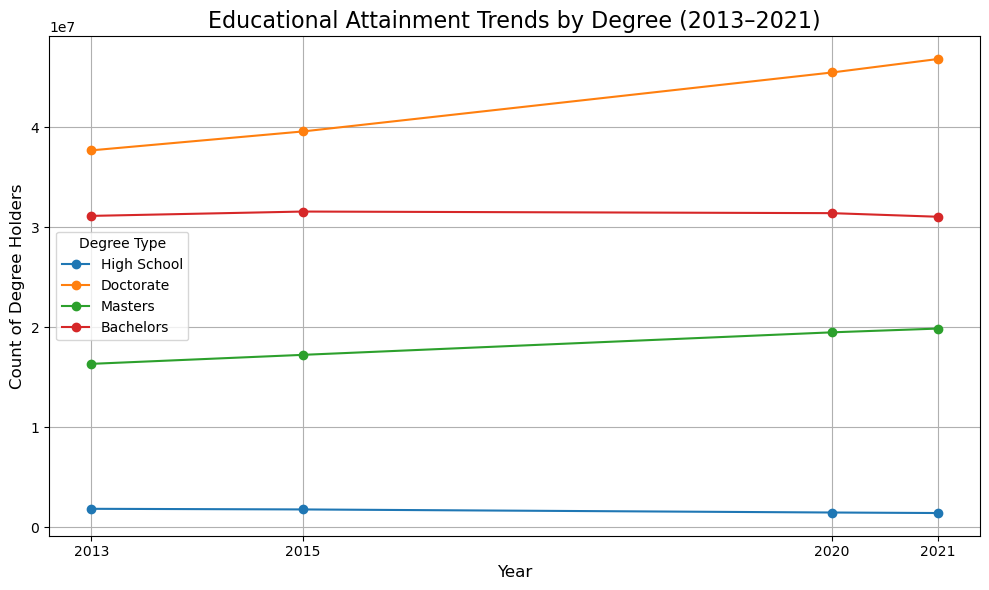

In [59]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Your Census API Key
api_key = '0a6b60135136d52965b7021241f7cfae54db1d4c'

# Base URLs for 2009, 2013, 2015, 2020 ACS 5-Year Data
base_urls = {
    2013: 'https://api.census.gov/data/2013/acs/acs5',
    2015: 'https://api.census.gov/data/2015/acs/acs5',
    2020: 'https://api.census.gov/data/2020/acs/acs5',
    2021: 'https://api.census.gov/data/2021/acs/acs5',
}

# Variables for different degrees
degree_variables = {
    'High School': 'B15002_005E',  # High school graduate
    'Doctorate': 'B15003_022E',  # Doctorate degree
    'Masters': 'B15003_021E',    # Master's degree
    'Bachelors': 'B15003_020E'   # Bachelor's degree
}

# Initialize list to store data for all degrees
all_data = []

# Loop through degrees and years to fetch data
for degree, variable in degree_variables.items():
    for year, base_url in base_urls.items():
        query_url = f'{base_url}?get={variable},NAME&for=state:*&key={api_key}'
        response = requests.get(query_url)

        if response.status_code == 200:
            # Convert to DataFrame
            data = response.json()
            columns = ['Count', 'State', 'StateFIPS']
            state_data = pd.DataFrame(data[1:], columns=columns)

            # Convert numeric column to integer
            state_data['Count'] = pd.to_numeric(state_data['Count'], errors='coerce')

            # Add Degree and Year columns
            state_data['Degree'] = degree
            state_data['Year'] = year

            # Group by Year and Degree to sum counts
            degree_year_data = state_data.groupby(['Degree', 'Year'])['Count'].sum().reset_index()

            # Append to the collected data
            all_data.append(degree_year_data)
        else:
            print(f"API Error for {degree} in {year}: {response.status_code}")
            print(response.text)

# Combine all data into one DataFrame
combined_data = pd.concat(all_data)

# Plot settings
plt.figure(figsize=(10, 6))

# Plot lines for each degree
for degree in combined_data['Degree'].unique():
    degree_data = combined_data[combined_data['Degree'] == degree]
    plt.plot(
        degree_data['Year'],
        degree_data['Count'],
        marker='o',
        label=degree
    )

# Enhance visualization
plt.title("Educational Attainment Trends by Degree (2013–2021)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count of Degree Holders", fontsize=12)
plt.xticks([2013, 2015, 2020, 2021])
plt.grid(True)
plt.legend(title="Degree Type", fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

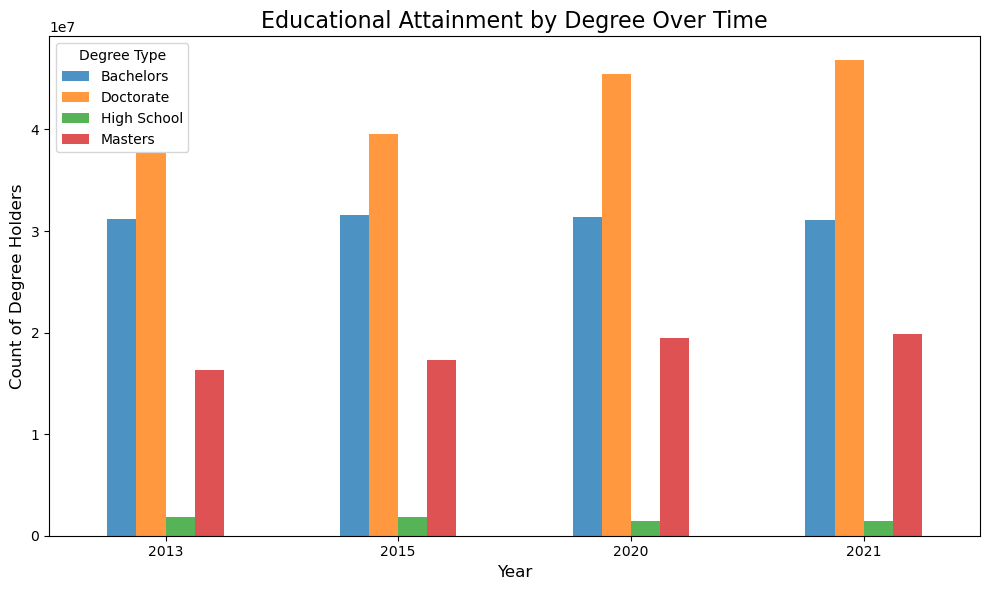

In [61]:
import matplotlib.pyplot as plt

# Aggregate data across all regions (if not already done)
aggregated_data = combined_data.groupby(['Degree', 'Year'])['Count'].sum().reset_index()

# Pivot data for grouped bar chart
bar_data = aggregated_data.pivot(index='Year', columns='Degree', values='Count')

# Plot grouped bar chart
bar_data.plot(kind='bar', figsize=(10, 6), alpha=0.8)

# Enhance visualization
plt.title("Educational Attainment by Degree Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count of Degree Holders", fontsize=12)
plt.xticks(rotation=0)  # Keeps year labels horizontal for better readability
plt.legend(title="Degree Type", fontsize=10)
plt.tight_layout()

# Show plot
plt.show()